In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pandas import DataFrame, Series
import pybbg
import pandas as pd
import numpy as np
from datetime import datetime
import pyblotter

This package is intended to work similar with [blotter package](http://www.r-bloggers.com/r-package-blotter/) R. 

Test

In [3]:
symbols = ['SPX', 'KOSPI200']
initDate = pd.to_datetime('20130102')

In [4]:
mktData = DataFrame([[0.1, 0.1], [0.1, 0.1]], index=[pd.to_datetime('20130104'), pd.to_datetime('20130105')], columns=symbols)
mktData

,SPX,KOSPI200
2013-01-04,0.1,0.1
2013-01-05,0.1,0.1


In [5]:
testAcct = pyblotter.Account(initDate, symbols, 100.0)

In [6]:
testAcct.addTxnDate(pd.to_datetime('20130104'))

In [7]:
testAcct.addTxn(pd.to_datetime('20130104'), 'SPX', 50.0)
testAcct.addTxn(pd.to_datetime('20130104'), 'KOSPI200', 50.0)

In [8]:
testAcct.updateAcct(pd.to_datetime('20130104'),mktData.ix['20130104'] )
testAcct.eq

,Cash,SPX,KOSPI200
2013-01-02,100,0,0
2013-01-04,0,50,50


In [9]:
testAcct.txns

,SPX,KOSPI200
2013-01-02,0,0
2013-01-04,50,50


In [10]:
testAcct.addTxnDate(pd.to_datetime('20130105'))

In [11]:
testAcct.txns

,SPX,KOSPI200
2013-01-02,0,0
2013-01-04,50,50
2013-01-05,50,50


In [12]:
testAcct.updateAcct(pd.to_datetime('20130105'),mktData.ix['20130105'] )
testAcct.eq

,Cash,SPX,KOSPI200
2013-01-02,100,0,0
2013-01-04,0,50,50
2013-01-05,0,55,55


In [13]:
testAcct.getEq('20130105')

110.00000000000001

In [14]:
testAcct.getPos('20130105', 'KOSPI200')

50.0

Testing Account class with [example in r-bloggers](http://www.r-bloggers.com/r-package-blotter/)

In [15]:
import pandas.io.data as web
start = datetime(2000,1,1)
end = datetime(2010,12,30)
spy = web.DataReader("SPY", "yahoo", start, end)
spy.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-12-23,125.639999,125.779999,125.290001,125.599998,70053700,114.635305
2010-12-27,125.129997,125.769997,125.040001,125.650002,58126000,114.680943
2010-12-28,125.900002,125.949997,125.500000,125.830002,55309100,114.845230
2010-12-29,125.980003,126.199997,125.900002,125.919998,58033100,114.927370
2010-12-30,125.800003,126.129997,125.529999,125.720001,76616900,114.744832


Adjust Low Value to be comparable with Adj Close

In [16]:
spy['Low'] = spy['Low'] * spy['Adj Close'] / spy['Close']
spy.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-12-23,125.639999,125.779999,114.352370,125.599998,70053700,114.635305
2010-12-27,125.129997,125.769997,114.124194,125.650002,58126000,114.680943
2010-12-28,125.900002,125.949997,114.544037,125.830002,55309100,114.845230
2010-12-29,125.980003,126.199997,114.909120,125.919998,58033100,114.927370
2010-12-30,125.800003,126.129997,114.571417,125.720001,76616900,114.744832


In [17]:
tmp = spy['Adj Close'].shift(1)

In [18]:
signal = tmp < spy['Low']
signal.head()

Date
2000-01-03    False
2000-01-04    False
2000-01-05    False
2000-01-06    False
2000-01-07     True
dtype: bool

First, check the performance graph of signal with normal pandas 

여기서 shift(-1)을 해주는 이유는 Pandas 로직 상 오늘의 수익률은 어제 대비 오늘 가격의 수익률이기 때문. 따라서 해당날짜의 수익률은 전일에 진입했으면 나오는 수익

In [19]:
spy['Adj Close'].tail()

Date
2010-12-23    114.635305
2010-12-27    114.680943
2010-12-28    114.845230
2010-12-29    114.927370
2010-12-30    114.744832
Name: Adj Close, dtype: float64

In [20]:
spy['Adj Close'].pct_change(1).tail()

Date
2010-12-23   -0.001431
2010-12-27    0.000398
2010-12-28    0.001433
2010-12-29    0.000715
2010-12-30   -0.001588
Name: Adj Close, dtype: float64

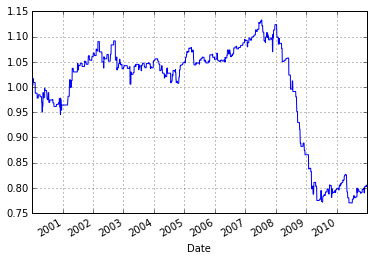

In [21]:
(spy['Adj Close'].pct_change(1).shift(-1) * signal + 1).cumprod().plot()

In [22]:
(spy['Adj Close'].pct_change(1).shift(-1) * signal + 1).cumprod().tail()

Date
2010-12-23    0.804476
2010-12-27    0.804476
2010-12-28    0.804476
2010-12-29    0.803198
2010-12-30         NaN
dtype: float64

In [23]:
spy_ret = spy['Adj Close'].pct_change(1)
spy_ret = DataFrame(spy_ret)
spy_ret.columns = ['SPY']
spy_ret.head()

,SPY
Date,
2000-01-03,NaN
2000-01-04,-0.039106
2000-01-05,0.001789
2000-01-06,-0.016071
2000-01-07,0.058076


In [24]:
spy_ret.tail()

,SPY
Date,
2010-12-23,-0.001431
2010-12-27,0.000398
2010-12-28,0.001433
2010-12-29,0.000715
2010-12-30,-0.001588


In [25]:
test = signal.index

In [26]:
signal.index

<class 'pandas.tseries.index.DatetimeIndex'>
[2000-01-03, ..., 2010-12-30]
Length: 2766, Freq: None, Timezone: None

In [27]:
testAcct = pyblotter.Account(datetime(2000,1,3), ['SPY'], 100.0)

In [28]:
%%time
for i in arange(1,len(signal)):
    testAcct.addTxnDate(signal.index[i])
    equity = testAcct.getEq(signal.index[i])
    position = testAcct.getPos(signal.index[i], 'SPY')

    if(position == 0.0):
        # Open a new position if signal is True
        if(signal[i]):
            testAcct.addTxn(signal.index[i], 'SPY', equity)
    else:
        # if position is open and signal is False, close out position
        if(not signal[i]):
            testAcct.addTxn(signal.index[i], 'SPY', -position)

    testAcct.updateAcct(signal.index[i], spy_ret.ix[signal.index[i]])

Wall time: 19.9 s


In [29]:
testAcct.txns.tail()

,SPY
2010-12-23,0.000000
2010-12-27,0.000000
2010-12-28,0.000000
2010-12-29,80.447622
2010-12-30,0.000000


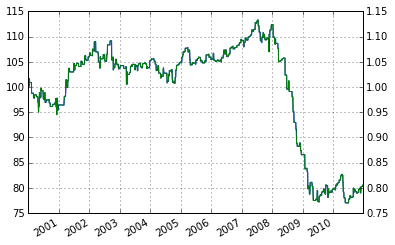

In [30]:
testAcct.getEqCurve().plot()
(spy['Adj Close'].pct_change(1).shift(-1) * signal + 1).cumprod().plot(secondary_y=True)

In [31]:
testAcct.eq.tail()

,Cash,SPY
2010-12-23,80.447622,0.000000
2010-12-27,80.447622,0.000000
2010-12-28,80.447622,0.000000
2010-12-29,0.000000,80.447622
2010-12-30,80.319848,0.000000
